<a href="https://colab.research.google.com/github/submouse9903/test-1/blob/master/U47768_CH05_CNN(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 343507235.58it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 112370773.49it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 232224955.39it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13030457.43it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
i = 0
image = train_dataset.data[i].float()/255
label = train_dataset.targets[i]

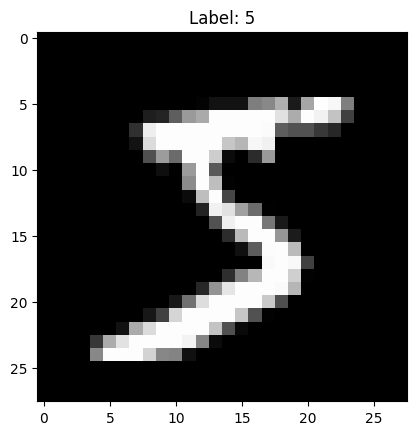

In [ ]:
plt.imshow(image, cmap='gray')
plt.title('Label: %d' % label)
plt.show()

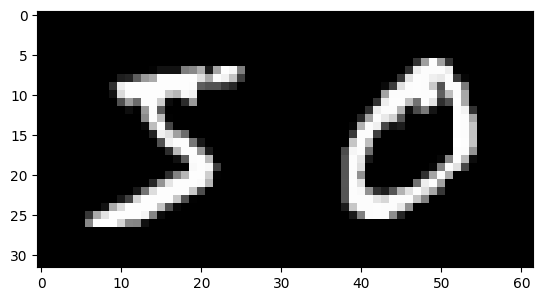

In [ ]:
images = [train_dataset[i][0] for i in range(2)]
# 타일 형식으로 이미지 시각화
grid_img = torchvision.utils.make_grid(images, nrow=2, ncols = 1)
plt.imshow(grid_img.permute(1, 2, 0))
plt.show()


torchvision.utils.make_grid 함수가 흑백 이미지의 채널을 변화시켜서, (채널, 세로, 가로)이미지를 생성한다. 하지만 imshow 함수는 채널을 먼저 받을 수 없어서 (세로, 가로, 채널)로 데이터를 변화한다. permute 함수를 사용하여 텐서의 차원을 재배열함

In [ ]:
print("dataset:",train_dataset[i][0].shape)
grid_img = torchvision.utils.make_grid(images, nrow=5, ncols = 5)
print("grid.img:", grid_img.shape)
print("permute image", grid_img.permute(1, 2, 0).shape)

dataset: torch.Size([1, 28, 28])
grid.img: torch.Size([3, 32, 62])
permute image torch.Size([32, 62, 3])


In [ ]:
batchsize = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batchsize)

In [ ]:
x = train_dataset.data[0].float()/255
x = x.reshape(1,28,28)

In [ ]:
layer1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2))              

In [ ]:
h1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)(x)
h1.shape

torch.Size([32, 28, 28])

In [ ]:
h1 = nn.ReLU()(h1)
h1.shape

torch.Size([32, 28, 28])

In [ ]:
h1 = nn.MaxPool2d(kernel_size = 2, stride = 2)(h1)
h1.shape

torch.Size([32, 14, 14])

In [ ]:
layer1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2))              
h1 = layer1(x)
h1.shape

torch.Size([32, 14, 14])

In [ ]:
layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2))         
h2 = layer2(h1)     
h2.shape

torch.Size([64, 7, 7])

In [ ]:
layer3 = nn.Sequential(nn.Flatten(0,-1),
                       nn.Linear(64*7*7,10),
                       nn.Softmax(dim=0))
output = layer3(h2)
output.shape

torch.Size([10])

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride =1, padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride =1, padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=64*7*7, out_features=128, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64, bias=True),
            nn.Sigmoid(),
            nn.Linear(in_features=64, out_features=10, bias=True),
            nn.Sigmoid(),
            nn.Softmax(dim = 1)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [ ]:
model = MyNeuralNetwork()
for i, (data, target) in enumerate(train_loader):
  output = model(data)
  if i==0:
    break
output[0]

tensor([0.0916, 0.1030, 0.1101, 0.1056, 0.0971, 0.0922, 0.1066, 0.0998, 0.0935,
        0.1004], grad_fn=<SelectBackward0>)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [ ]:
device

'cuda'

In [ ]:
model = MyNeuralNetwork().to(device)


In [ ]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
cross_entropy = nn.CrossEntropyLoss().to(device)  

In [ ]:
num_B = 10
loss_vec = np.zeros(num_B)
optimizer.zero_grad()

for i in range(num_B):
  val_vec = []
  if i == 5:
    print("Learning rate is updated")
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate/2)
  for j, (data, target) in enumerate(train_loader):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    loss = cross_entropy(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(output.data,1)
    v =((predicted.indices == target).sum()).item()/len(target)
    val_vec.append(v)
  print ("Accuracy: {:.4f}".format(np.array(val_vec).mean()))

Accuracy: 0.9388
Accuracy: 0.9733
Accuracy: 0.9695
Accuracy: 0.9622
Accuracy: 0.9539
Learning rate is updated
Accuracy: 0.9737
Accuracy: 0.9748
Accuracy: 0.9753
Accuracy: 0.9748
Accuracy: 0.9768


In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batchsize)
for i, (dataset, target) in enumerate(test_loader):
  print(dataset[0,:,:,:].shape)
  break
 


torch.Size([1, 28, 28])


In [ ]:
v = 0
for i, (dataset, target) in enumerate(test_loader):
  X = dataset.to(device)
  Y = target.to(device)
  output = model(X)
  predicted = torch.max(output.data,1)
  v = v + ((predicted.indices == Y).sum()).item()
print(v)

9796


In [ ]:
"Accuracy is {:.4f}%".format(v/len(test_dataset.targets))

'Accuracy is 0.9796%'